# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    print data.head()
    #print data.columns.values
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicatessen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  
Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
display(data.describe())
#print data.keys()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [6]:
#print data.loc[(data['Grocery'] >30000) & (data['Fresh'] > 40)]

# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [333,129,47]
# high (grocery, detergents), medium to low (others) --> can be a grocery shop
# high fresh produce, low everything else --> can be a vegetable shop
# above avg everything --> can be a super market or a restaurant

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8565,4980,67298,131,38102,1215
1,42312,926,1510,1718,410,1819
2,44466,54259,55571,7782,24171,6465


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

indices = [333,129,47]
 * Index 333 
     - The fresh produce, milk and delicatessen items are around the mean whereas the grocery and detergents are quite high compared to the mean (note that as an example, the mean for the grocery is 7951 whereas this customer's grocery value is 67298). A similar story for detergents_paper also. So it is likely that this customer specializes in using more grocery and detergents_paper and just normal amounts of other stuff like fresh products and milk. 
     - So this could be a grocery shop or a retail shop.
 * Index 129 
     - The thing that is striking about this customer is that the amount of fresh products is very high (42312 compared to the median value of 4755 or the mean value of 7951). Almost all the other things are either average or quite low indeed.
     - So this customer could be a large scale vegetable market.
 * Index 47 
     - The most noteworthy thing about this customer is that almost all the products are purchased for a large amount (compared to the means of the respective product categories.) Nothing is just close to the mean, all products are to the far right from the mean. 
     - So this customer would likely be using all the products to a large extent. My guess is this customeris a large restaurant or a large super market that sells all types of products.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [8]:
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Detergents_Paper', axis=1)
y_data = data['Detergents_Paper']

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, y_data, test_size=0.2, random_state=0)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(max_depth=3, random_state=0)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
y_pred = regressor.predict(X_test)
score = performance_metric(y_test, y_pred)
print score

0.764658595908


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

I removed the Detergents feature and try to predict it using the other features. The prediction score comes to 0.76 which is a decent score. So I think this feature is really not that independent from the other features and is not strictly required for the model.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

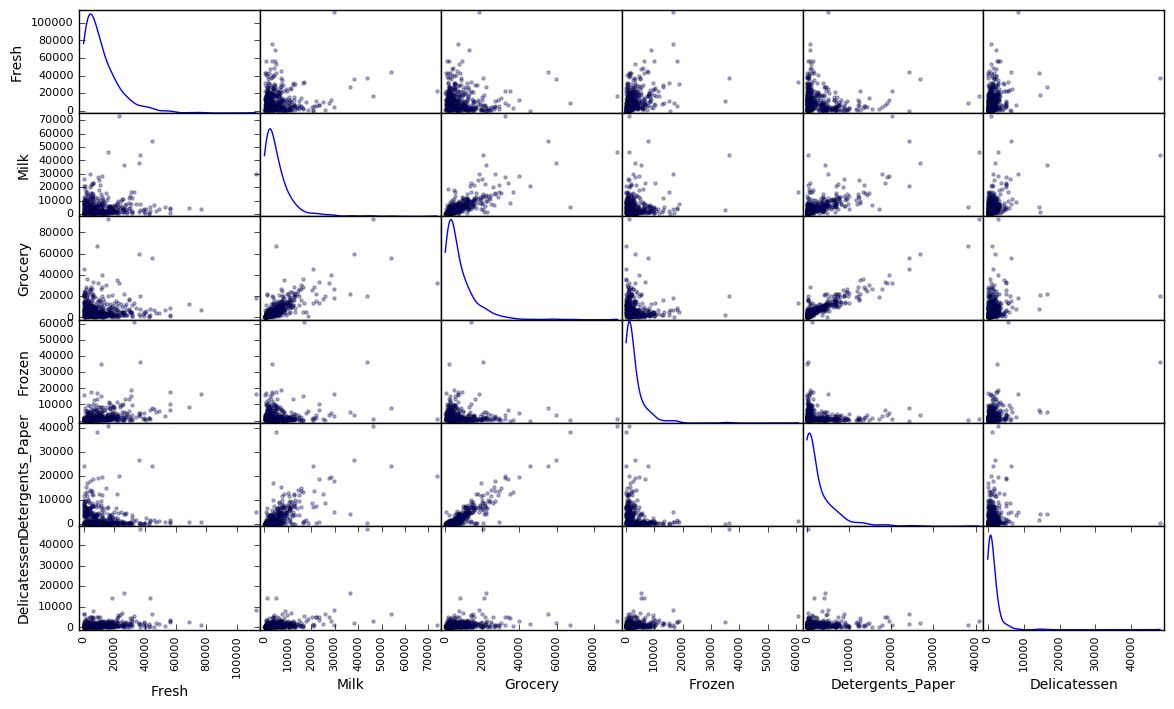

In [10]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [12]:
#lets visualize the corelation in the data.
#we can clearly see that grocery is highly corelated with detergents_paper
#we also see a good positive corelation between milk and grocery 
#and also between milk and detergents_paper
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** 

Detergents and Grocery show a strong positive corelation. This kind of confirms the suspicion that Detergents is not really that much of an independent feature.

All the individual features are distributed somewhat normally (but not a proper normal distribution) with the right tail being much longer than the left tail (i.e a large positive skew).

If we take a look at the (Detergent,Grocery) plot, we can see that there is a linear relationship.

Note that (milk, detergent) and (milk, grocery) also show a little bit of positive corelation

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

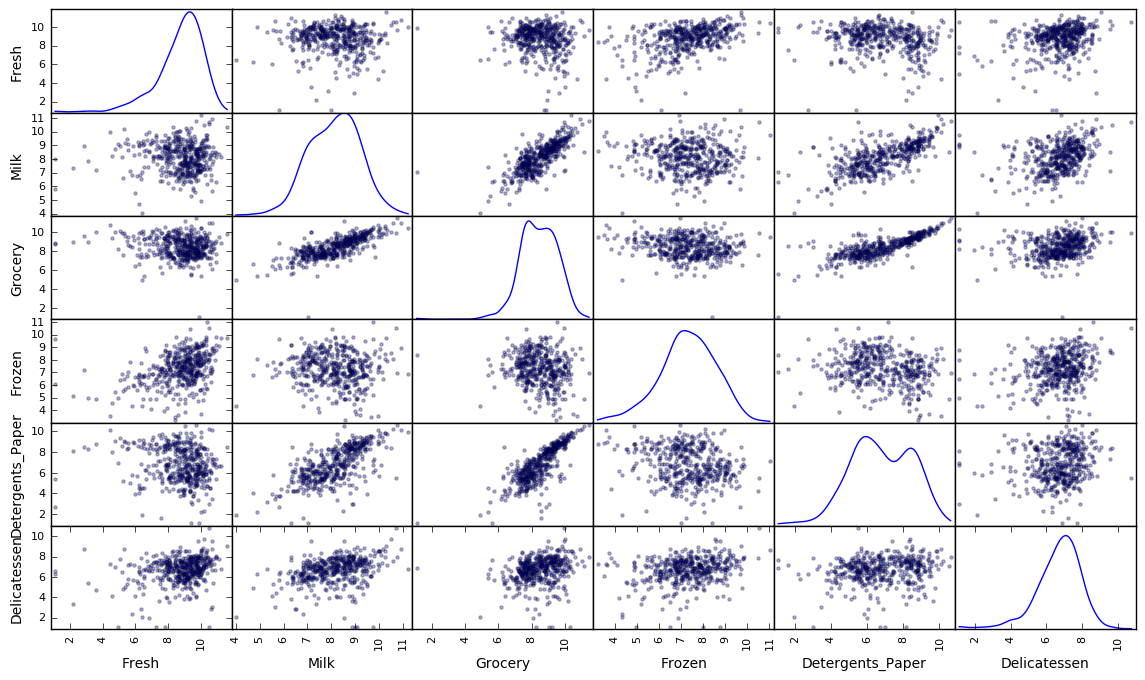

In [14]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [15]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.055439,8.513185,11.116886,4.875197,10.548022,7.102499
1,10.652826,6.830874,7.319865,7.448916,6.016157,7.506042
2,10.702480,10.901524,10.925417,8.959569,10.092909,8.774158


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [42]:
# For each feature find the data points with extreme high or low values
all_outliers= []
all_multi_outliers = []
for feature in log_data.keys():
    print feature
    #print data[feature]
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    #print Q1
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    #print Q3
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    #print step
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    #print outliers.index
    
    multi_outliers = set(all_outliers).intersection(outliers.index)
    all_multi_outliers = list(set(all_multi_outliers) | set(multi_outliers))
    #print 'all multi outliers',all_multi_outliers
    
    all_outliers = list(set(all_outliers) | set(outliers.index))
    #print 'all outliers',all_outliers
    display(outliers)
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = list(set(all_outliers) - set(all_multi_outliers))
print 'total number of data points :', len(data)
print 'total number of outliers :', len(outliers)
#print 'final outliers',outliers

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

# we will also test without removing any outliers and see the performance 
good_data_all = log_data
#print good_data

Fresh
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Milk
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Grocery
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Frozen
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Detergents_Paper
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Delicatessen
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


total number of data points : 440
total number of outliers : 37


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

The following indices are outliers for more than 1 feature
- index 66,128 - Fresh and deli items
- 154 - milk and grocery
- 75 - grocery and detergents.
- 65 - Fresh and Frozen

I would remove only those indices where there was an outlier in only 1 feature (which could possibly be a measurement error). If there is an outlier in more than 1 feature it is unlikely that this point is an actual outlier (lets assume for the moment that all features are independent) since 2 features getting measured wrongly for the same customer is less likely than 1 feature being reported wrongly.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

[ 0.44237417  0.27657107  0.11617342  0.09617719  0.0457568   0.02294735]
[[ 4.60179702 -0.33071296  1.52209419 -1.35513191  0.90394679  1.18040648]
 [-1.82598742  1.49800477  0.54918581 -0.96743512  1.05937686  0.02186573]
 [ 4.37799191  3.99720974  0.20610947  0.67130921 -0.53505338 -0.0225993 ]]
explained variance is
Dimension 1    0.4424
Dimension 2    0.7190
Dimension 3    0.8352
Dimension 4    0.9314
Dimension 5    0.9772
Dimension 6    1.0001
Name: Explained Variance, dtype: float64
-----
[ 0.49161092  0.24720297  0.09740485  0.09176809  0.0458413   0.02617187]
[[ 4.62052253  1.09469942 -1.53597488  1.20705635  0.965136   -1.01441776]
 [-1.66177808 -1.2902403  -0.82291767  0.81323655  1.11817156  0.11768346]
 [ 4.75270433 -3.44558907 -0.2164225  -0.21934239 -0.5718577   0.15492151]]
explained variance is
Dimension 1    0.4916
Dimension 2    0.7388
Dimension 3    0.8362
Dimension 4    0.9280
Dimension 5    0.9738
Dimension 6    1.0000
Name: Explained Variance, dtype: float64
----

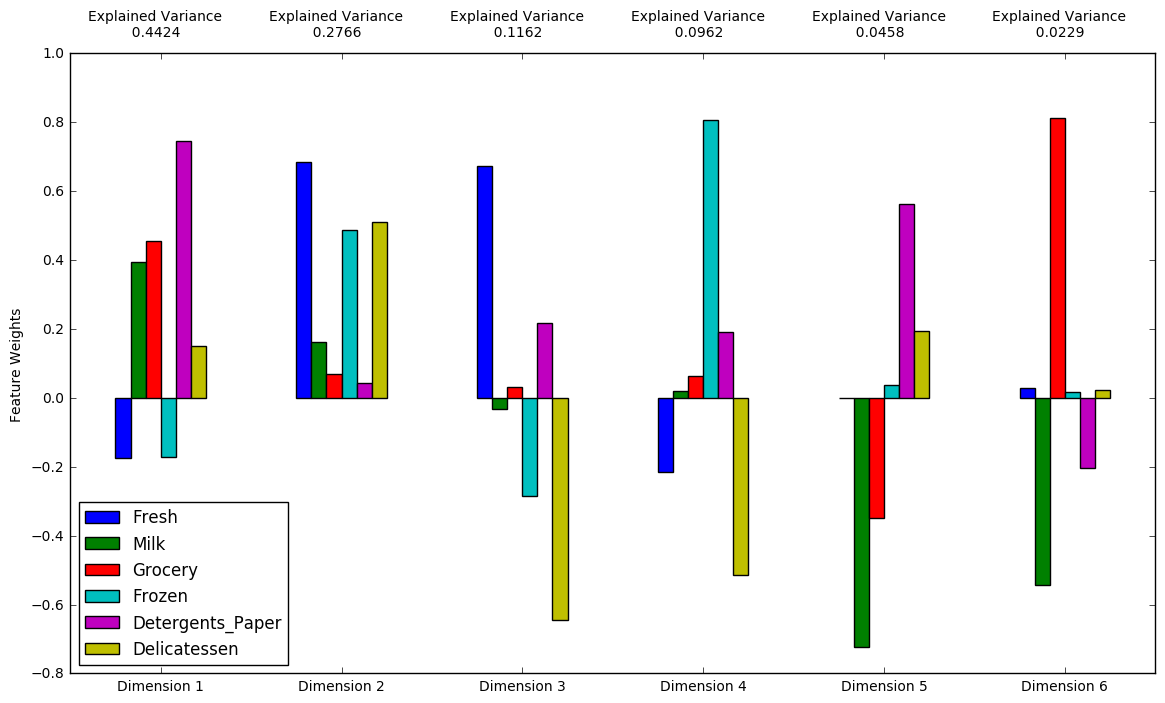

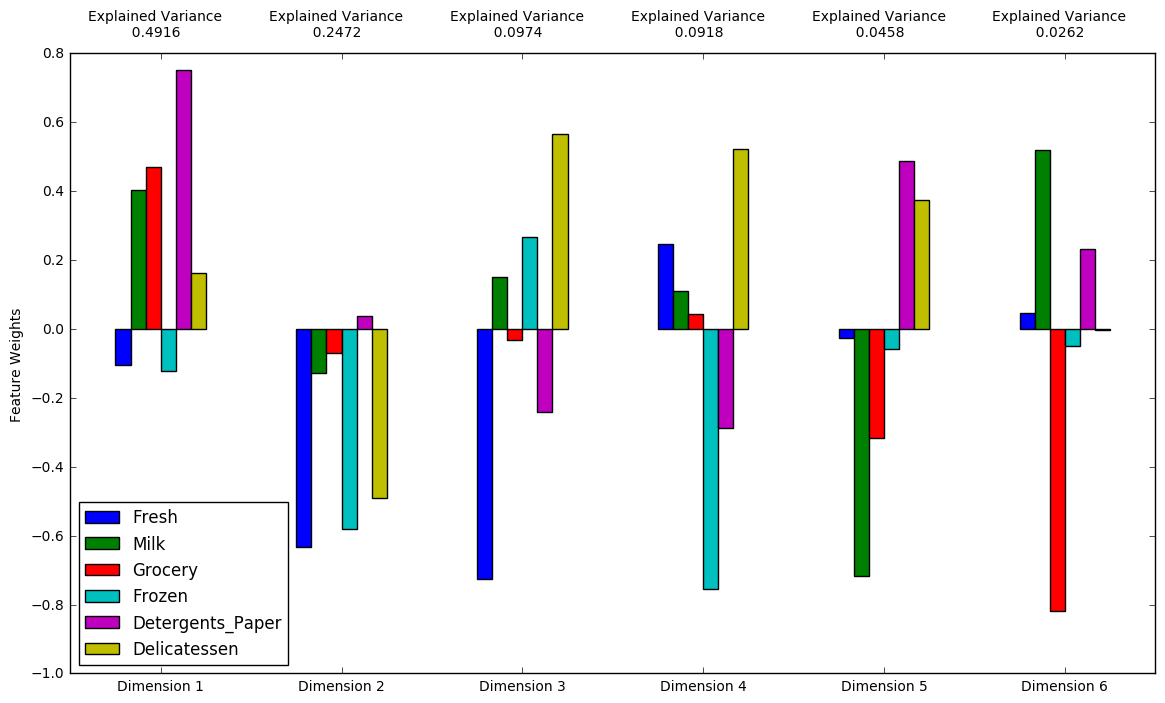

In [64]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA

# we will evaluate the model both without removing the outliers 
#as well as with removing the outliers and report out the results that we observe
for data in [good_data_all, good_data]:
    pca = PCA(n_components=6)
    pca.fit(data)
    print pca.explained_variance_ratio_

    # TODO: Transform the sample log-data using the PCA fit above
    pca_samples = pca.transform(log_samples)
    print pca_samples

    # Generate PCA results plot
    pca_results = vs.pca_results(data, pca)

    print 'explained variance is'
    print pca_results['Explained Variance'].cumsum()
    print '-----'

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

The first and second principal components explain 0.49161092  and 0.24720297 of the data (out of a total variance of 1.0). So 73.8% of variance is explained by the first 2 principal components.

The first 4 PCs explain 92.8% of the variance in the data.

In terms of customer spending, the following is the interpretation of the first 4 principal components:

* 1st Principal component : 
    - The first dimension is positively correlated with milk, grocery and detergents. Therefore, customers like cofee shops, grocery/retail shops would have a high positive value along this dimension.

* 2nd principal component : 
    - This PC is negatively correlated with fresh products, frozen products and delicatessen. All of these are items used in cuisine. So customers like restaurants will have a large negative value along this axis.

* 3rd principal component : 
    - This has a positive correlation with delicatessen and a negative correlation with fresh products. So a customer like vegetable market will have a large negative value along this axis.

* 4th principal component : 
    - This has a negative correlation to frozen items and a positive correlation to delicatessen. So a customer like fish market will have a large negative value along this axis and a customer like a specialized restaurant will have a large positive value along this axis.


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [65]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,4.6205,1.0947,-1.5360,1.2071,0.9651,-1.0144
1,-1.6618,-1.2902,-0.8229,0.8132,1.1182,0.1177
2,4.7527,-3.4456,-0.2164,-0.2193,-0.5719,0.1549


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [66]:
# TODO: Apply PCA by fitting the good data with only two dimensions
# we will evaluate the model both without removing the outliers 
#as well as with removing the outliers and report out the results that we observe
for data in [good_data_all, good_data]:
    pca = PCA(n_components=2)
    pca.fit(data)
    print pca.explained_variance_ratio_

    # TODO: Transform the good data using the PCA fit above
    reduced_data = pca.transform(data)
    print reduced_data[:5]

    # TODO: Transform the sample log-data using the PCA fit above
    pca_samples = pca.transform(log_samples)
    print pca_samples

    # Create a DataFrame for the reduced data
    reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
    print '------------'

[ 0.44237417  0.27657107]
[[ 1.75098532  0.07051523]
 [ 1.80036534  0.86975357]
 [ 1.89373597  1.67662072]
 [-1.12731297  1.45798229]
 [ 0.79671147  2.46086569]]
[[ 4.60179702 -0.33071296]
 [-1.82598742  1.49800477]
 [ 4.37799191  3.99720974]]
------------
[ 0.49161092  0.24720297]
[[ 1.77825482  0.48832119]
 [ 1.90194444 -0.51576539]
 [ 2.01854347 -1.32599778]
 [-0.95850788 -1.40980508]
 [ 1.01989953 -2.16746488]]
[[ 4.62052253  1.09469942]
 [-1.66177808 -1.2902403 ]
 [ 4.75270433 -3.44558907]]
------------


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [67]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,4.6205,1.0947
1,-1.6618,-1.2902
2,4.7527,-3.4456


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

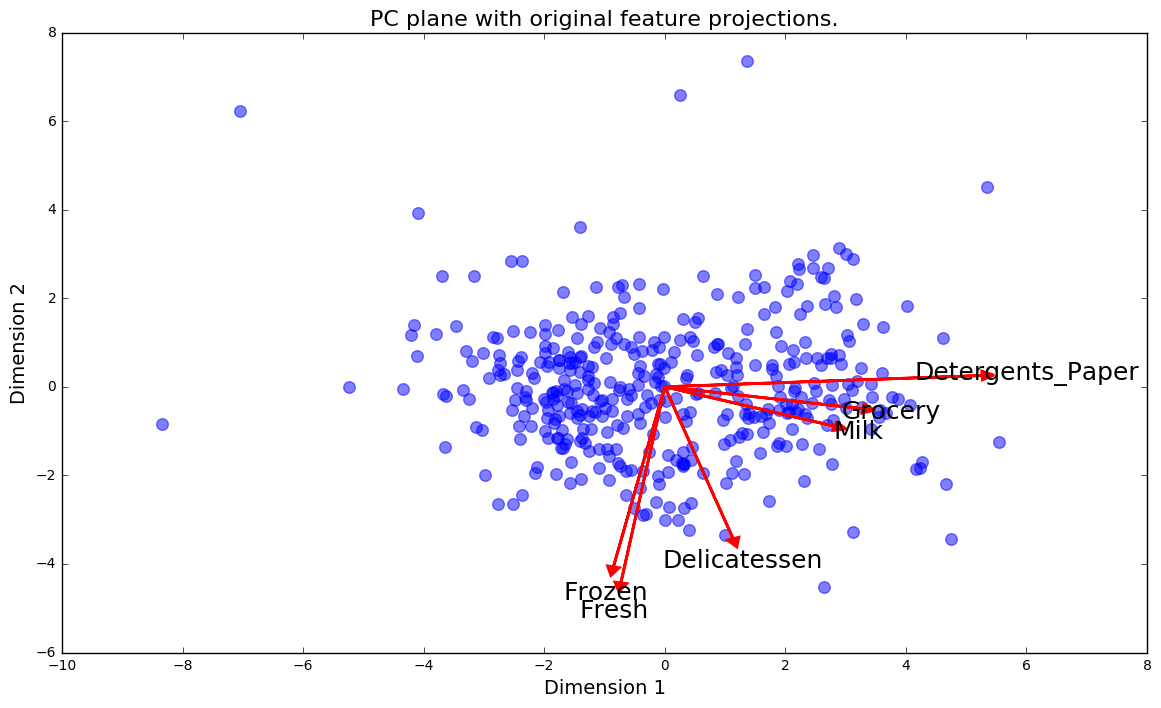

In [68]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

In [26]:
# Answer:
# Detergents, Grocery and Milk are positively corelated with the 1st principal component
# Frozen, Fresh and Deli items are negatively corelated with the 2nd principal component
# Yes, the observations are inline with the pca plot we obtained earlier

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

k-Means clustering algorithm (lloyd's clustering algo) can be used when we are certain about the cluster a point belongs to. 
Initially we assign cluster centers randomly. Then, we assign each point to the nearest cluster center and calculate the mean by computing the centroid of all the points in the cluster. We repeat the process till convergence. 

In the GMM model (which is a specific case of EM algorithm using gaussians for the distribution), we are not certain about the cluster a point belongs to, so we take a probabilistic approach and calculte the likelihood that point i belongs to cluster j as a Gaussian; After this we recalibrate the mean using the expectation calculated in the previous step. So here, the probability that a point belongs to any particular cluster is non-zero (but could be very small in some cases as the Gaussian flattens out)

k-Means algorithm is very straightforward, easy to implement and works very well when there is no uncertainty about which cluster a point belongs to ot there are no mixed membership of points to multiple clusters.
On the other hand, GMM is much more flexible in assigning clusters to points. A point can belong to multiple clusters with varying degrees of confidence. 

In our example, we do not see definite well seperated clusters in the first 2 principal components, so i would go with GMM for further analysis.

Ref  : 
- https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian
- https://sites.google.com/site/dataclusteringalgorithms/k-means-clustering-algorithm

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [69]:
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

for n in range(2,11):
    #print 'Trying with number of clusters = {} ', n
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    # I tried from 2 to 10 clusters and 2 or 3 clusters gives the best silhouette score
    #clusterer = KMeans(random_state=0)
    clusterer = GMM(random_state=0, n_components=n)
    clusterer.fit(reduced_data)
    #print clusterer.labels_

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    #print preds

    # TODO: Find the cluster centers
    centers = clusterer.means_
    #print 'centers',centers

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)
    #print sample_preds

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print 'clusters : {}, score : {}'.format(n,score)

clusters : 2, score : 0.418703821796
clusters : 3, score : 0.426302706573
clusters : 4, score : 0.325386453905
clusters : 5, score : 0.272478904149
clusters : 6, score : 0.270971582845
clusters : 7, score : 0.279030223412
clusters : 8, score : 0.278129838596
clusters : 9, score : 0.26192696276
clusters : 10, score : 0.281837014492


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**


When we do not remove the outliers, the silhouette scores for the clusters with size 2, 3 and 4 are :
- clusters : 2, score : 0.316017379116
- clusters : 3, score : 0.375222595239
- clusters : 4, score : 0.336237830562

compare this with the silhouette score when we remove the outliers and we get the following silhouette scores:
- clusters : 2, score : 0.418703821796
- clusters : 3, score : 0.426302706573
- clusters : 4, score : 0.325386453905

So I would like to indeed remove the outliers in this case as that gives a better silhouette score.

So with the outliers removed, the silhouette scores for cluster sizes ranging from 2 to 10 are :

- clusters : 2, score : 0.418703821796
- clusters : 3, score : 0.426302706573
- clusters : 4, score : 0.325386453905
- clusters : 5, score : 0.272478904149
- clusters : 6, score : 0.270971582845
- clusters : 7, score : 0.279030223412
- clusters : 8, score : 0.278129838596
- clusters : 9, score : 0.26192696276
- clusters : 10, score : 0.281837014492

---

Out of these, 2 or 3 clusters has the best silhouette score.

- clusters : 2, score : 0.418703821796
- clusters : 3, score : 0.426302706573

And since both 2-cluster and 3-cluster solutions give similar silhouette score, we will choose the 'simpler' model of 2-cluster.

In [70]:
#Determine the predictions for 2 clusters
clusterer = GMM(random_state=0, n_components=2)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

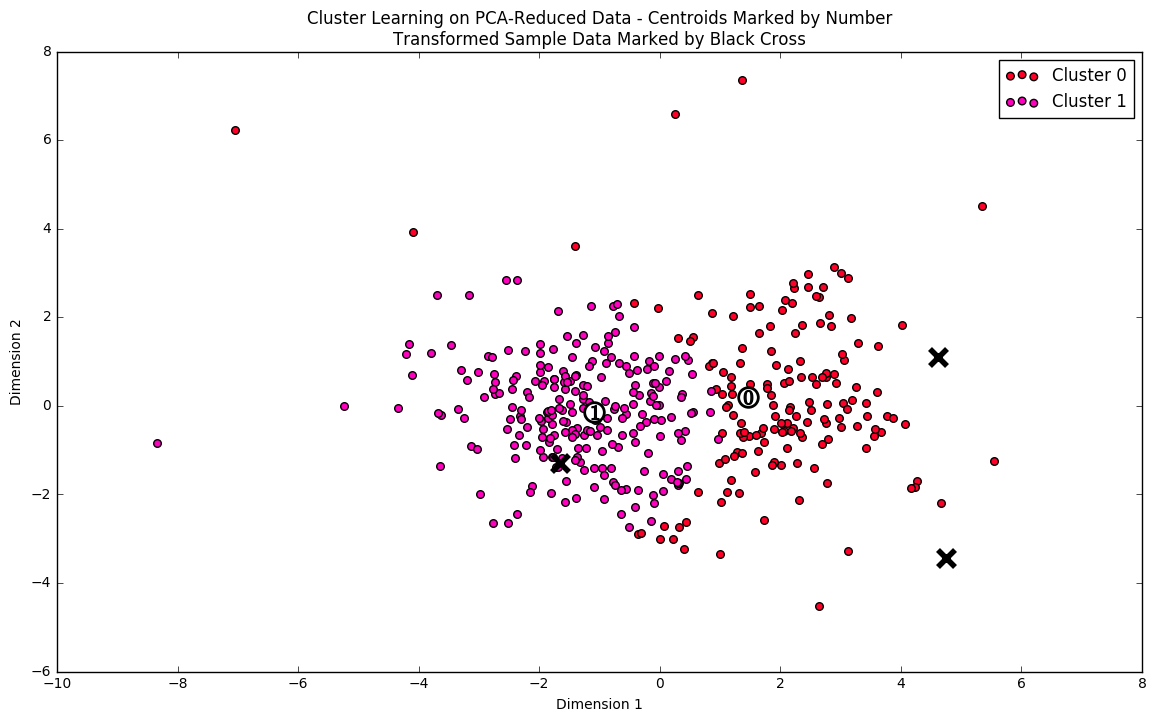

In [71]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [72]:
# TODO: Inverse transform the centers
print 'centers', centers
log_centers = pca.inverse_transform(centers)
print 'log centers', log_centers

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)
print 'true centers', true_centers

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

centers [[ 1.46026446  0.20068243]
 [-1.0978748  -0.15087965]]
log centers [[ 8.61296726  8.6759653   9.06985408  7.1083067   7.87869479  6.90621181]
 [ 9.10165524  7.69033542  7.89346447  7.62382585  5.94243929  6.6640295 ]]
true centers [[ 5502.55199514  5860.35407298  8689.35575811  1222.07644752
   2640.42400937   998.45771707]
 [ 8970.12811472  2187.10802839  2679.71163243  2046.3763026    380.86283047
    783.70251073]]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,5503.0,5860.0,8689.0,1222.0,2640.0,998.0
Segment 1,8970.0,2187.0,2680.0,2046.0,381.0,784.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

* Segment 0 : 
    - High values of grocery, milk and detergents compared to segment 1. 
    - Note that the grocery value and milk values of this segment are slightly more than the mean values of grocery and milk in the overall dataset
    - This suggests that segment 0 would represent customers who buy things like milk and grocery in high volumes.
    - So this can represent a cafe or a restaurant or a grocery shop

* Segment 1 : 
    - Relatively high values of fresh and frozen items compared to segment 0. 
    - But even the fresh and frozen items are closer to the overall median in the original dataset (slightly larger than the median but little less than the mean)
    - This suggests that segment 1 could represent customers who but higher volumes of fresh and frozen items.    
    - So this can represent a market for fresh/frozen produce.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [73]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**

Following are the original sample points:

- point         | Fresh | Milk	| Grocery	| Frozen	| Detergents_Paper	| Delicatessen
- point 0	    | 8565	| 4980	| 67298	    | 131	    | 38102	            | 1215
- point 1	    | 42312	| 926 	| 1510	    | 1718	    | 410	            | 1819
- point 2	    | 44466	| 54259	| 55571	    | 7782	    | 24171	            | 6465

The sample predictions are 
- point 0 - cluster 0
- point 1 - cluster 1
- point 2 - cluster 0

This was our prediction earlier:
indices = [333,129,47]
 * point 0 - high in  (grocery and detergents), medium to low (others) --> can be a grocery/retail shop
 * point 1 - high fresh produce, low in everything else --> can be a vegetable shop/market
 * point 2 - high quantity of all products --> can be a super market or a restaurant

So our original predictions are reasonably consistent with the segments we derived from clustering


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

- For A/B testing to be effective, the experiment group should be very similar to the control group, othewise any change in the A/B result might be due to some other variable other than the variable being tested.
- With that context, we can say that each cluster has data points that are similar enough that we can run A/B testing within each cluster. 
- So we can randomly pick a few points (say 5% of the data points within a particular cluster) and change the the delivery service from 5 days to 3 days and measure whether the customer react positively. If the outcome is statistically siginificant (say there is a +5% or more change in the favourable customer response compared to the control group that comprises of the other data points within the same cluster) then we can say that this particular group of customers react positively to this change.

ref : http://stats.stackexchange.com/questions/192752/clustering-and-a-b-testing

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

I think there are 2 ways of accomplishing this:
- From the estimated spending for the customer, use pca.transform() to transform the points to lower dimensional space and then use clusterer.predict() on those points in reduced dimensional space
- Alternatively, if we apply supervised learning techniques, we can consider the segment type as the target variable and the values of amount spent on each food type as the features. From this we can model a supervised classification system and then give the new customers data as input and we can get the cluster type as the output.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

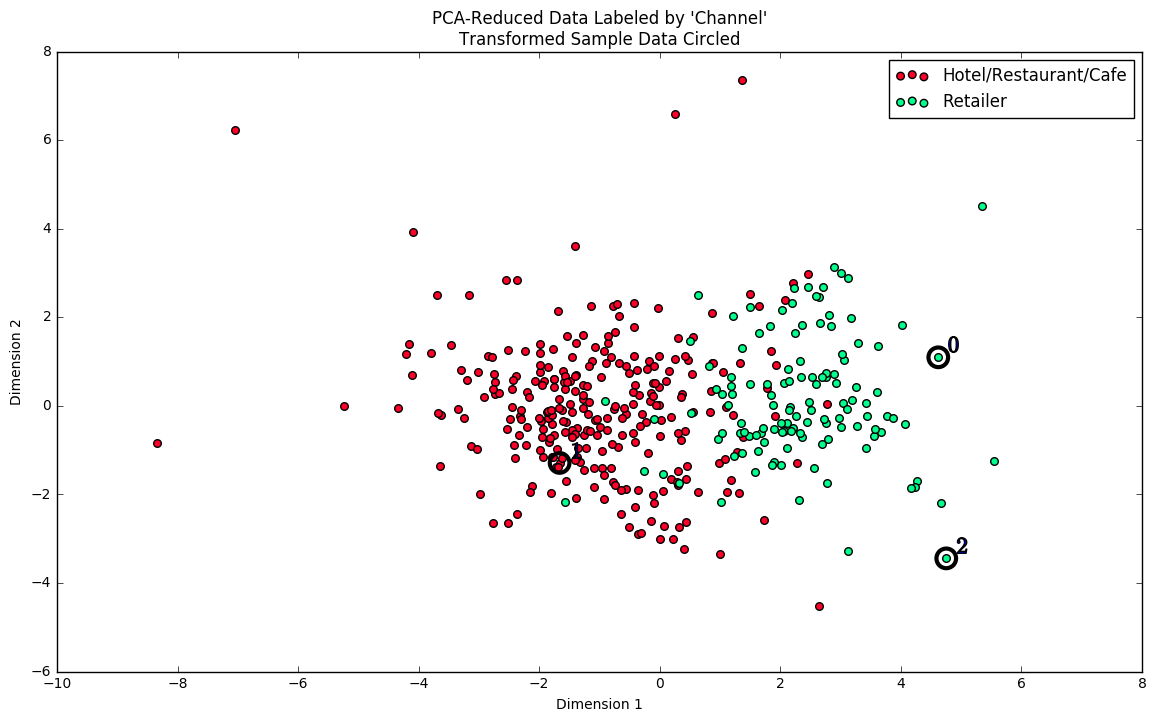

In [75]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The number of clusters that I chose compares very well to this hidden channel variable.

Note that the clustering that we did earlier produced the following segments:
- Segment 0 : Can represent a cafe or a restaurant or a grocery shop
- Segment 1 : Can represent a vegetable market/super market

And all the 3 sample data points that were chosen initially are coming under the correct channel type (i.e if we consider channel1 -== cluster1 and channel2 == cluster 2)

In the distribution shown above, points to the far right would be classified as purely retail and points to the far left would be classified as purely Hotel/Restaurant/Cafe (because they are far away on either side of the cluster center for the corresponding clusters)

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.